In [1]:
import xgboost as xgb
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.nn import functional as F
from glob2 import glob
import os
from copy import copy
from time import time
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# from dataloader import make_dataloader
# from dataloader import predict_cancel_param
# from dataloader import load_test_dataset
from easydict import EasyDict

from model import Model

import matplotlib.pyplot as plt
import pickle

In [2]:
# This is a sample Python script.

# Set the seed for numpy
np.random.seed(123)

# Display all columns of Pandas' dataframes by default
pd.set_option('display.max_columns', None)

In [3]:
## DataLoader
args = EasyDict()
# args.train_data_path = 'data/0804_*/'
# args.label_data_filename = 'proc_data_20220117-121000_76Cases.csv'
# args.batch_size = 1
# args.valid_batch_size = 1

# print(os.getcwd())

args.device = "cuda" if torch.cuda.is_available() else "cpu"

In [5]:
# path check!! if not run dataloader!!
# df = make_dataloader(args)

# col_names = ["label","factor_sub","hist_bin0",

# col_names = ["label","factor_sub","0th_bin","1st_bin","2nd_bin","3rd_bin","4th_bin","5th_bin","6th_bin","7th_bin","8th_bin","9th_bin","10th_bin","11th_bin","12th_bin","13th_bin","14th_bin","15th_bin","16th_bin","17th_bin","18th_bin","19th_bin","20th_bin","21st_bin","22nd_bin","23rd_bin","24th_bin","25th_bin","26th_bin","27th_bin","28th_bin","29th_bin","30th_bin","31st_bin","32nd_bin","33rd_bin","34th_bin","35th_bin","36th_bin","37th_bin","38th_bin","39th_bin","40th_bin","41st_bin","42nd_bin","43rd_bin","44th_bin","45th_bin","46th_bin","47th_bin","48th_bin","49th_bin","50th_bin","51st_bin","52nd_bin","53rd_bin","54th_bin","55th_bin","56th_bin","57th_bin","58th_bin","59th_bin","60th_bin","61st_bin","62nd_bin","63rd_bin"]
# df = pd.read_csv('data/proc_data_20220201-033053_68Cases_Uniform.csv', header=None, names=col_names, index_col=False)

col_names = ["label","0th_bin","1st_bin","2nd_bin","3rd_bin","4th_bin","5th_bin","6th_bin","7th_bin","8th_bin","9th_bin","10th_bin","11th_bin","12th_bin","13th_bin","14th_bin","15th_bin","16th_bin","17th_bin","18th_bin","19th_bin","20th_bin","21st_bin","22nd_bin","23rd_bin","24th_bin","25th_bin","26th_bin","27th_bin","28th_bin","29th_bin","30th_bin","31st_bin","32nd_bin","33rd_bin","34th_bin","35th_bin","36th_bin","37th_bin","38th_bin","39th_bin","40th_bin","41st_bin","42nd_bin","43rd_bin","44th_bin","45th_bin","46th_bin","47th_bin","48th_bin","49th_bin","50th_bin","51st_bin","52nd_bin","53rd_bin","54th_bin","55th_bin","56th_bin","57th_bin","58th_bin","59th_bin","60th_bin","61st_bin","62nd_bin","63rd_bin"]
df = pd.read_csv('data/proc_data_20220201-033053_68Cases_Uniform_NoFactor.csv', header=None, names=col_names, index_col=False)

# col_names = ["label","bin_0","bin_1","bin_2","bin_3","bin_4","bin_5","bin_6","bin_7","bin_8","bin_9","bin_10","bin_11","bin_12","bin_13","bin_14","bin_15","bin_16","bin_17","bin_18","bin_19","bin_20","bin_21","bin_22","bin_23","bin_24","bin_25","bin_26","bin_27","bin_28","bin_29","bin_30","bin_31","bin_32","bin_33","bin_34","bin_35","bin_36","bin_37","bin_38","bin_39","bin_40","bin_41","bin_42","bin_43","bin_44","bin_45","bin_46","bin_47","bin_48","bin_49","bin_50","bin_51","bin_52","bin_53","bin_54","bin_55","bin_56","bin_57","bin_58","bin_59","bin_60","bin_61","bin_62","bin_63","bin_64","bin_65","bin_66","bin_67","bin_68","bin_69","bin_70","bin_71","bin_72","bin_73","bin_74","bin_75","bin_76","bin_77","bin_78","bin_79","bin_80","bin_81","bin_82","bin_83","bin_84","bin_85","bin_86","bin_87","bin_88","bin_89","bin_90","bin_91","bin_92","bin_93","bin_94","bin_95","bin_96","bin_97","bin_98","bin_99","bin_100","bin_101","bin_102","bin_103","bin_104","bin_105","bin_106","bin_107","bin_108","bin_109","bin_110","bin_111","bin_112","bin_113","bin_114","bin_115","bin_116","bin_117","bin_118","bin_119","bin_120","bin_121","bin_122","bin_123","bin_124","bin_125","bin_126","bin_127","bin_128","bin_129","bin_130","bin_131","bin_132","bin_133","bin_134","bin_135","bin_136","bin_137","bin_138","bin_139","bin_140","bin_141","bin_142","bin_143","bin_144","bin_145","bin_146","bin_147","bin_148","bin_149","bin_150","bin_151","bin_152","bin_153","bin_154","bin_155","bin_156","bin_157","bin_158","bin_159","bin_160","bin_161","bin_162","bin_163","bin_164","bin_165","bin_166","bin_167","bin_168","bin_169","bin_170","bin_171","bin_172","bin_173","bin_174","bin_175","bin_176","bin_177","bin_178","bin_179","bin_180","bin_181","bin_182","bin_183","bin_184","bin_185","bin_186","bin_187","bin_188","bin_189","bin_190","bin_191","bin_192","bin_193","bin_194","bin_195","bin_196","bin_197","bin_198","bin_199","bin_200","bin_201","bin_202","bin_203","bin_204","bin_205","bin_206","bin_207","bin_208","bin_209","bin_210","bin_211","bin_212","bin_213","bin_214","bin_215","bin_216","bin_217","bin_218","bin_219","bin_220","bin_221","bin_222","bin_223","bin_224","bin_225","bin_226","bin_227","bin_228","bin_229","bin_230","bin_231","bin_232","bin_233","bin_234","bin_235","bin_236","bin_237","bin_238","bin_239","bin_240","bin_241","bin_242","bin_243","bin_244","bin_245","bin_246","bin_247","bin_248","bin_249","bin_250","bin_251","bin_252","bin_253","bin_254","bin_255"]
# df = pd.read_csv('data/proc_data_20220123-225249_256bin_Uniform_NoFactor.csv', header=None, names=col_names, index_col=False)

df.shape

(4420, 65)

In [6]:
# Display the first few rows of the dataset
df.head(5)

,label,0th_bin,1st_bin,2nd_bin,3rd_bin,4th_bin,5th_bin,6th_bin,7th_bin,8th_bin,9th_bin,10th_bin,11th_bin,12th_bin,13th_bin,14th_bin,15th_bin,16th_bin,17th_bin,18th_bin,19th_bin,20th_bin,21st_bin,22nd_bin,23rd_bin,24th_bin,25th_bin,26th_bin,27th_bin,28th_bin,29th_bin,30th_bin,31st_bin,32nd_bin,33rd_bin,34th_bin,35th_bin,36th_bin,37th_bin,38th_bin,39th_bin,40th_bin,41st_bin,42nd_bin,43rd_bin,44th_bin,45th_bin,46th_bin,47th_bin,48th_bin,49th_bin,50th_bin,51st_bin,52nd_bin,53rd_bin,54th_bin,55th_bin,56th_bin,57th_bin,58th_bin,59th_bin,60th_bin,61st_bin,62nd_bin,63rd_bin
0,0,33,552,4252,15187,32463,48794,61481,78842,104805,122881,124450,108967,95817,89868,91477,96921,102985,102578,96880,94385,94528,89205,91255,93480,94310,106785,128526,159026,203373,236466,230515,200473,170686,148782,131913,120613,113650,106233,97486,89662,84605,82056,79005,77070,74950,75191,76474,78633,79807,79534,79810,79421,78328,77513,77109,78787,82886,86009,88352,89140,87736,87605,87103,87544
1,0,29,351,2835,10976,24855,40951,53976,65837,87899,109934,119087,114135,99440,89721,85696,87559,92681,97111,97266,92702,90712,91755,88742,87802,89122,88627,95267,113119,139082,177065,219209,232638,212395,181742,157478,138367,123804,114353,108669,100929,92517,85867,82066,79294,76769,74653,73407,73721,74620,76972,77705,76958,77412,77302,76204,75413,75184,76553,80107,83601,86126,87278,86682,86018
2,0,20,245,1855,7767,18816,33053,46023,56957,72481,94610,109488,113321,103642,92508,84646,82265,83982,87679,91466,92227,88797,86964,88558,88513,85549,85292,83856,86869,97743,119318,151054,192809,224235,221252,195865,168763,147900,129981,117555,110111,104014,96414,88875,83330,79571,76977,74636,72882,71694,72008,73014,75247,75546,74844,75126,74751,74179,73494,73679,74037,76955,81025,83583,85306
3,0,15,170,1214,5259,13886,25928,38624,49321,59798,78911,97776,106320,105496,95531,86508,80573,79610,79915,82964,85698,86677,85627,83276,85189,87255,84937,82289,80253,80569,86176,100175,125165,162219,202371,221279,209819,182793,159320,140375,123906,113082,106747,99979,92872,86312,81131,77814,74582,72977,71272,70216,70539,71127,73403,73414,72985,72933,72320,72316,71722,71888,71767,74092,77507
4,0,12,134,843,3841,10524,20729,32595,43569,53164,66868,86445,100295,102912,97350,88424,81783,77566,77369,77833,79732,81895,82994,82142,81223,83069,86629,84418,81117,77842,77095,81733,91504,113600,148277,189566,216294,212470,189491,165751,145370,128152,115280,107773,101245,94254,88089,82226,78021,75351,72712,71278,70253,69551,70264,71185,72862,72364,71732,71266,71141,70969,70723,71091,71664


In [529]:
# def reduce_nomalies(df, pct_nomalies=1.0):
#     labels = df['label'].copy()
#     is_nomaly = labels == 0.0

#     num_normal = np.sum(~is_nomaly)
#     num_nomalies = int(pct_nomalies * num_normal)

#     all_anomalies = labels[labels == 0]
#     anomalies_to_keep = np.random.choice(all_anomalies.index, size=num_nomalies, replace=False)
#     anomalous_data = df.iloc[anomalies_to_keep].copy()
#     normal_data = df[~is_nomaly].copy()
#     new_df = pd.concat([normal_data, anomalous_data], axis=0)
#     return new_df

# df = reduce_nomalies(df)

In [7]:
# Check types of anomalies/labels in dataset.
pd.DataFrame(df['label'].value_counts())

,label
0,2924
1,748
2,748


In [8]:
# here we train a label encoder so that we can map our classes to integers later for model training
le = LabelEncoder()
le.fit(df.label)
print(le.classes_)

# capture the labels
labels = df['label'].copy()

# convert labels to integers
integer_labels = le.transform(labels)

numeric_vars = list(set(df.columns.values.tolist()))
numeric_vars.remove('label')
numeric_data = df[numeric_vars].copy()

# check that the numeric data has been captured accurately
numeric_data.head()

[0 1 2]


,1st_bin,9th_bin,23rd_bin,4th_bin,49th_bin,15th_bin,17th_bin,52nd_bin,62nd_bin,31st_bin,22nd_bin,25th_bin,28th_bin,55th_bin,30th_bin,13th_bin,58th_bin,32nd_bin,63rd_bin,47th_bin,42nd_bin,46th_bin,21st_bin,59th_bin,8th_bin,18th_bin,60th_bin,35th_bin,45th_bin,38th_bin,34th_bin,57th_bin,26th_bin,5th_bin,6th_bin,14th_bin,36th_bin,56th_bin,48th_bin,50th_bin,40th_bin,10th_bin,27th_bin,19th_bin,0th_bin,12th_bin,20th_bin,37th_bin,2nd_bin,3rd_bin,24th_bin,43rd_bin,51st_bin,29th_bin,61st_bin,11th_bin,44th_bin,33rd_bin,41st_bin,39th_bin,54th_bin,7th_bin,16th_bin,53rd_bin
0,552,122881,93480,32463,79534,96921,102578,78328,87103,200473,91255,106785,203373,78787,230515,89868,88352,170686,87544,78633,79005,76474,89205,89140,104805,96880,87736,120613,75191,97486,131913,86009,128526,48794,61481,91477,113650,82886,79807,79810,84605,124450,159026,94385,33,95817,94528,106233,4252,15187,94310,77070,79421,236466,87605,108967,74950,148782,82056,89662,77109,78842,102985,77513
1,351,109934,87802,24855,76972,87559,97111,77412,86682,232638,88742,88627,139082,75413,219209,89721,80107,212395,86018,73721,82066,73407,91755,83601,87899,97266,86126,138367,74653,108669,157478,76553,95267,40951,53976,85696,123804,75184,74620,77705,92517,119087,113119,92702,29,99440,90712,114353,2835,10976,89122,79294,76958,177065,87278,114135,76769,181742,85867,100929,76204,65837,92681,77302
2,245,94610,88513,18816,72008,82265,87679,75546,83583,192809,88558,85292,97743,74751,151054,92508,73679,224235,85306,72882,88875,74636,86964,74037,72481,91466,76955,168763,76977,117555,195865,73494,83856,33053,46023,84646,147900,74179,71694,73014,104014,109488,86869,92227,20,103642,88797,129981,1855,7767,85549,83330,75247,119318,81025,113321,79571,221252,96414,110111,75126,56957,83982,74844
3,170,78911,85189,13886,71272,80573,79915,71127,74092,125165,83276,84937,80569,72985,100175,95531,72316,162219,77507,74582,99979,77814,85627,71722,59798,82964,71888,209819,81131,140375,221279,72320,82289,25928,38624,86508,182793,72933,72977,70216,113082,97776,80253,85698,15,105496,86677,159320,1214,5259,87255,92872,70539,86176,71767,106320,86312,202371,106747,123906,73414,49321,79610,73403
4,134,66868,81223,10524,72712,81783,77369,69551,71091,91504,82142,86629,77842,72862,81733,97350,71266,113600,71664,78021,107773,82226,82994,71141,53164,77833,70969,216294,88089,165751,189566,71732,84418,20729,32595,88424,212470,72364,75351,71278,128152,86445,81117,79732,12,102912,81895,189491,843,3841,83069,101245,70253,77095,70723,100295,94254,148277,115280,145370,71185,43569,77566,70264


In [9]:
# split data into test and train
x_train, x_test, y_train, y_test = train_test_split(numeric_data,
                                                    integer_labels,
                                                    test_size=.25,
                                                    shuffle=False)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3315, 64)
(3315,)
(1105, 64)
(1105,)


In [10]:
# def convert_label_to_binary(label_encoder, labels):
#     normal_idx = np.where(label_encoder.classes_ == 0)[0][0]
#     my_labels = labels.copy()
#     my_labels[my_labels != normal_idx] = 1 
#     my_labels[my_labels == normal_idx] = 0
#     return my_labels

# y_train = convert_label_to_binary(le, y_train)
# y_test = convert_label_to_binary(le, y_test)

# # check how many anomalies are in our labels
# print('Number of anomalies in y_train: ', y_train.sum())
# print('Number of anomalies in y_test:  ', y_test.sum())

# # le.classes_


In [11]:
# # split data into test and train
# x_train, x_test, y_train, y_test = train_test_split(numeric_data,
#                                                     integer_labels,
#                                                     test_size=.25,
#                                                     random_state=42)

# # check that the dimensions of our train and test sets are okay
# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)

In [12]:
# # # Assign new test dataset

# thres_size = x_test.shape[0]//2

# # x_train = numeric_data[:]
# # x_test = numeric_data[:]

# x_eval2 = x_test[thres_size:]
# x_test = x_test[:thres_size]

# y_eval2 = y_test[thres_size:]
# y_test = y_test[:thres_size]

# # # check that the dimensions of our train and test sets are okay
# print(x_eval2.shape)
# print(x_test.shape)
# print(y_eval2.shape)
# print(y_test.shape)

In [13]:
# save the datasets for later use
preprocessed_data = {
    'x_train':x_train,
    'y_train':y_train,
    'x_test':x_test,
    'y_test':y_test,
    'le':le
}

In [14]:
# pickle the preprocessed_data
path = 'data/preprocessed_data_full.pkl'
out = open(path, 'wb')
pickle.dump(preprocessed_data, out)
out.close()

In [15]:
# [95]
le.classes_ == 0
num_labels = len(le.classes_)
num_rounds = 200

params = {
    'num_rounds': num_rounds,
    'max_depth': 4,
    'max_leaves': 2**4,
    'alpha': 0.9,
    'eta': 0.1,
    'gamma': 0.1,
    'learning_rate': 0.1,
    'subsample': 1,
    'reg_lambda': 1,
    'scale_pos_weight': 2,
    'tree_method': 'gpu_hist',
    'n_gpus': 1,
    'objective': 'multi:softprob',
#     'objective': 'binary:logistic',
    'verbose': True,
    'num_class': num_labels
}

In [16]:
%%time
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
evals = [(dtest, 'test',), (dtrain, 'train')]
model = xgb.train(params, dtrain, num_rounds, evals=evals)

[06:24:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.4.0\include\xgboost/generic_parameters.h:38: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.
[06:24:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "num_rounds", "scale_pos_weight", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:24:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'.

In [17]:
# 4.2 Testing and Evaluation
preds = model.predict(dtest)

pred_labels = np.argmax(preds, axis=1)
true_labels = y_test


# # for ROC
# threshold = .5
# pred_labels = (preds > threshold).astype(int)
# # print(pred_labels)
# true_labels = y_test.astype(int)



[06:24:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.4.0\include\xgboost/generic_parameters.h:38: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.


In [18]:
pd.DataFrame(true_labels).to_csv('data/true_labels.csv', header=False, index=True)

pd.DataFrame(preds).to_csv('data/preds.csv', header=True, index=True)

pd.DataFrame(x_test).to_csv('data/x_test.csv', header=True, index=True)

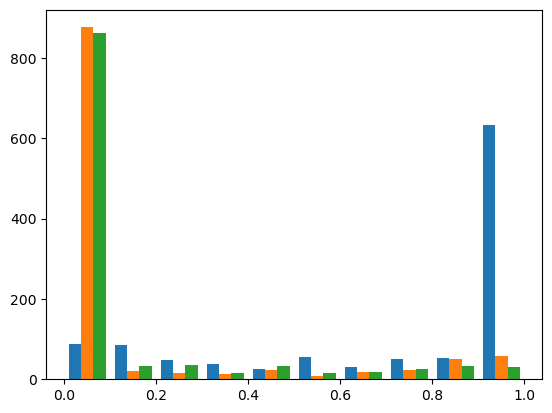

In [19]:

# preds = model.predict(dtest2)

plt.hist(preds)
plt.show()
pd.DataFrame(preds).to_csv('data/preds.csv', header=False, index=False)

# pred_labels = np.argmax(preds, axis=1)
# true_labels = y_eval2

In [20]:
# # compute the auc
# auc = roc_auc_score(true_labels, preds)
# print(auc)

# 4.3 Accuracy
print ('Accuracy Score :', accuracy_score(true_labels, pred_labels))

# metrics(y_test, preds)

Accuracy Score : 0.7972850678733032


Confusion Matrix :


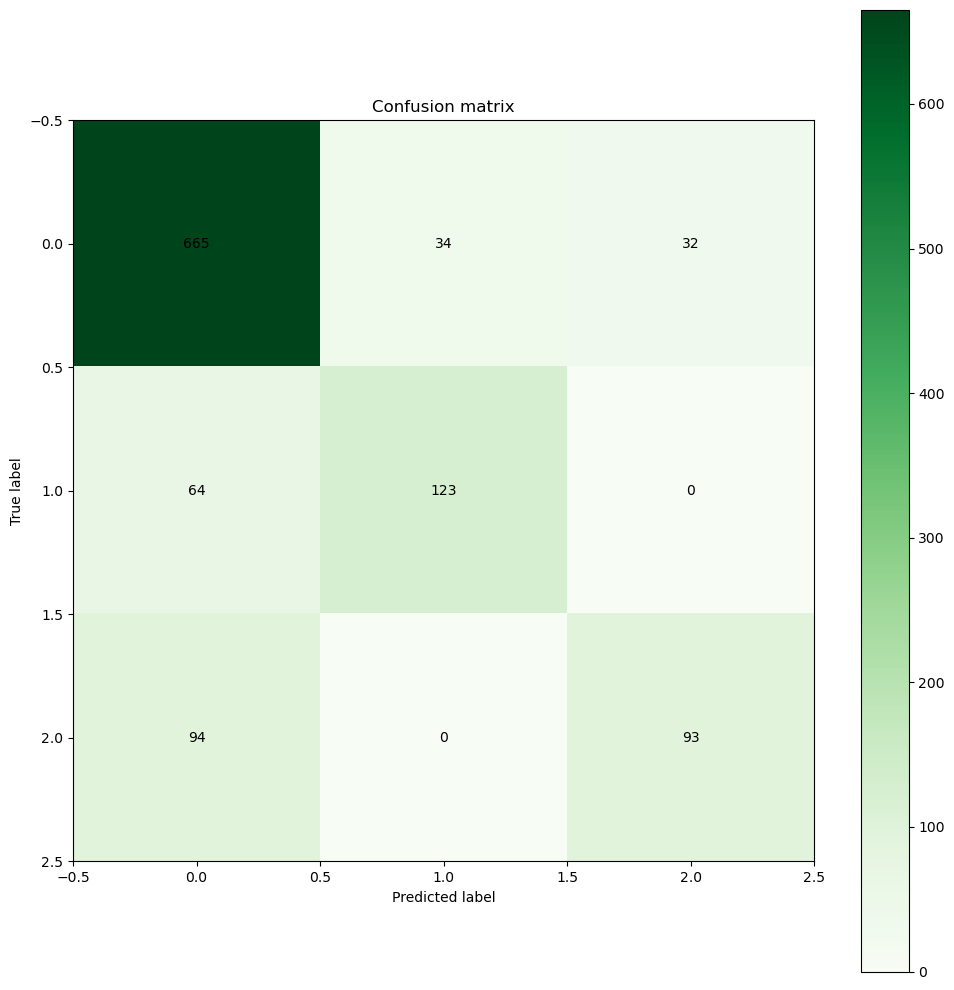

In [21]:
#2.8 Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)

print('Confusion Matrix :')

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Greens):
    plt.figure(figsize=(10,10),)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    # tick_marks = np.arange(len(target_names))
    # plt.xticks(tick_marks, target_names, rotation=45)
    # plt.yticks(tick_marks, target_names)
    plt.tight_layout()

    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x),
                         horizontalalignment='center',
                         verticalalignment='center')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plot_confusion_matrix(cm)

plt.show()

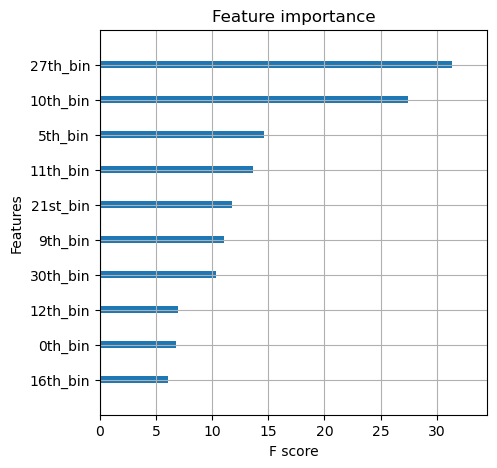

In [26]:
# 2.10 Model Inspection
ax = xgb.plot_importance(model, max_num_features=10, importance_type='gain', show_values=False)
fig = ax.figure
fig.set_size_inches(5, 5) # 20, 20
plt.show()

Number of anomalies in pred_labels:  184
Number of anomalies in true_labels:  187


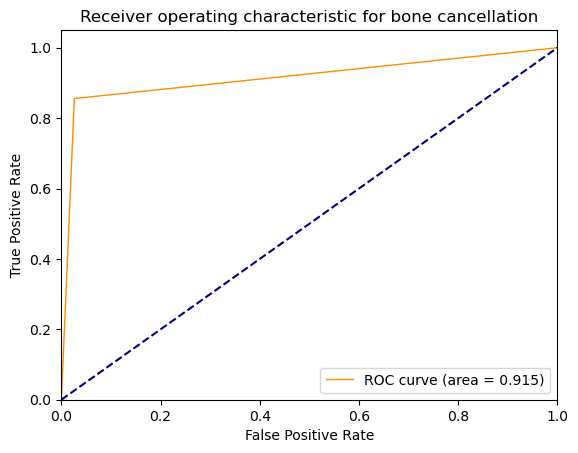

In [545]:
# ROC for Soft-Tissue label
def convert_label_to_binary(label_encoder, labels):
    tissue_idx = np.where(label_encoder.classes_ == 1)[0][0]
    my_labels = labels.copy()
    my_labels[my_labels != tissue_idx] = 0 
    my_labels[my_labels == tissue_idx] = 1
    return my_labels

binary_pred_labels = convert_label_to_binary(le, pred_labels)
binary_true_labels = convert_label_to_binary(le, true_labels)

# check how many anomalies are in our labels
print('Number of anomalies in pred_labels: ', binary_pred_labels.sum())
print('Number of anomalies in true_labels: ', binary_true_labels.sum())


# ROC
fpr, tpr, thresholds = roc_curve(binary_true_labels, binary_pred_labels)
roc_auc = roc_auc_score(binary_true_labels, binary_pred_labels)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for bone cancellation')
plt.legend(loc="lower right")
plt.show()

# CM
cm = confusion_matrix(binary_true_labels, binary_pred_labels)

Number of anomalies in pred_labels:  188
Number of anomalies in true_labels:  187


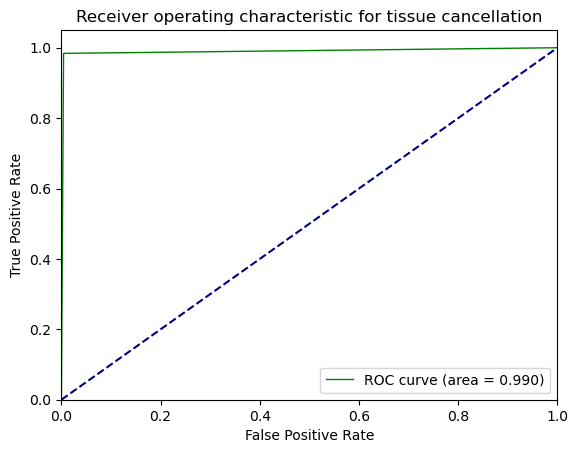

In [525]:
# ROC for Bone label
def convert_label_to_binary(label_encoder, labels):
    bone_idx = np.where(label_encoder.classes_ == 2)[0][0]
    my_labels = labels.copy()
    my_labels[my_labels != bone_idx] = 0 
    my_labels[my_labels == bone_idx] = 1
    return my_labels

binary_pred_labels = convert_label_to_binary(le, pred_labels)
binary_true_labels = convert_label_to_binary(le, true_labels)

# check how many anomalies are in our labels
print('Number of anomalies in pred_labels: ', binary_pred_labels.sum())
print('Number of anomalies in true_labels: ', binary_true_labels.sum())


# ROC
fpr, tpr, thresholds = roc_curve(binary_true_labels, binary_pred_labels)
roc_auc = roc_auc_score(binary_true_labels, binary_pred_labels)

plt.figure()
plt.plot(fpr, tpr, color='green', lw=1, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for tissue cancellation')
plt.legend(loc="lower right")
plt.show()

# CM
cm = confusion_matrix(binary_true_labels, binary_pred_labels)

In [380]:
# 모델 사용하기! 

# args.test_data_path = 'data/Temp/'
# test_dataset = load_test_dataset(args)

col_names2 = col_names.copy()[1:]
# col_names = ["label","factor_sub","hist_bin0","hist_bin1","hist_bin2","hist_bin3","hist_bin4","hist_bin5","hist_bin6","hist_bin7","hist_bin8","hist_bin9","hist_bin10","hist_bin11","hist_bin12","hist_bin13","hist_bin14","hist_bin15","hist_bin16","hist_bin17","hist_bin18","hist_bin19","hist_bin20","hist_bin21","hist_bin22","hist_bin23","hist_bin24","hist_bin25","hist_bin26","hist_bin27","hist_bin28","hist_bin29","hist_bin30","hist_bin31","hist_bin32","hist_bin33","hist_bin34","hist_bin35","hist_bin36","hist_bin37","hist_bin38","hist_bin39","hist_bin40","hist_bin41","hist_bin42","hist_bin43","hist_bin44","hist_bin45","hist_bin46","hist_bin47","hist_bin48","hist_bin49","hist_bin50","hist_bin51","hist_bin52","hist_bin53","hist_bin54","hist_bin55","hist_bin56","hist_bin57","hist_bin58","hist_bin59","hist_bin60","hist_bin61","hist_bin62","hist_bin63"]
df2 = pd.read_csv('data/Temp/result/test_dataset_20210825-213633.csv', header=None, names=col_names2, index_col=False)

df2.head()
# print(col_names2)

C:\Users\IWCHOI\.conda\envs\des_2021\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


,hist_bin0,hist_bin1,hist_bin2,hist_bin3,hist_bin4,hist_bin5,hist_bin6,hist_bin7,hist_bin8,hist_bin9,hist_bin10,hist_bin11,hist_bin12,hist_bin13,hist_bin14,hist_bin15,hist_bin16,hist_bin17,hist_bin18,hist_bin19,hist_bin20,hist_bin21,hist_bin22,hist_bin23,hist_bin24,hist_bin25,hist_bin26,hist_bin27,hist_bin28,hist_bin29,hist_bin30,hist_bin31,hist_bin32,hist_bin33,hist_bin34,hist_bin35,hist_bin36,hist_bin37,hist_bin38,hist_bin39,hist_bin40,hist_bin41,hist_bin42,hist_bin43,hist_bin44,hist_bin45,hist_bin46,hist_bin47,hist_bin48,hist_bin49,hist_bin50,hist_bin51,hist_bin52,hist_bin53,hist_bin54,hist_bin55,hist_bin56,hist_bin57,hist_bin58,hist_bin59,hist_bin60,hist_bin61,hist_bin62,hist_bin63
0,40.0,257.0,5922.0,41061.0,143312.0,290154.0,408551.0,440155.0,428610.0,378393.0,339822.0,323049.0,319298.0,305209.0,306650.0,345371.0,393331.0,421208.0,497167.0,517524.0,421729.0,342297.0,297535.0,272556.0,239672.0,192551.0,143263.0,98447.0,72626.0,63745.0,56700.0,48563.0,43719.0,39314.0,35321.0,32707.0,30217.0,27250.0,24775.0,21876.0,19937.0,18311.0,16384.0,258938.0,12680.0,10469.0,9088.0,7144.0,5980.0,5648.0,6186.0,7511.0,11177.0,19307.0,31843.0,58734.0,95366.0,112472.0,96855.0,78677.0,66653.0,60290.0,16993.0,623.0
1,41.0,208.0,4434.0,30990.0,110835.0,240438.0,362310.0,417061.0,419515.0,390866.0,346268.0,322681.0,316512.0,309165.0,299135.0,316715.0,370052.0,401779.0,452642.0,528729.0,476757.0,379315.0,318966.0,285459.0,258307.0,215133.0,166400.0,120658.0,84363.0,67708.0,61205.0,53663.0,46479.0,41606.0,37719.0,34042.0,31470.0,29074.0,26160.0,23614.0,20977.0,263357.0,17462.0,15688.0,13901.0,11663.0,9758.0,8221.0,6490.0,5753.0,6002.0,6963.0,9356.0,15741.0,24112.0,41726.0,78009.0,114866.0,101085.0,82809.0,70774.0,65271.0,42316.0,6325.0
2,42.0,169.0,3454.0,23831.0,87268.0,200376.0,319089.0,389979.0,407058.0,393935.0,358025.0,326494.0,314376.0,312160.0,298803.0,303051.0,346161.0,391093.0,426070.0,510490.0,517280.0,419910.0,343917.0,298382.0,272276.0,232770.0,182614.0,137173.0,97215.0,72884.0,64096.0,58048.0,49388.0,43798.0,39346.0,35589.0,32231.0,30439.0,27496.0,24662.0,266228.0,19832.0,18211.0,16219.0,14503.0,12322.0,10301.0,8629.0,6946.0,5960.0,6223.0,7168.0,9223.0,15701.0,22226.0,36765.0,73398.0,116668.0,98520.0,80304.0,74505.0,62849.0,49881.0,12689.0
3,43.0,144.0,2772.0,19006.0,70043.0,167287.0,279757.0,364626.0,389330.0,391509.0,367045.0,334335.0,315508.0,313189.0,303830.0,298873.0,327170.0,381035.0,413798.0,488130.0,540639.0,458095.0,369270.0,314303.0,283826.0,246814.0,193342.0,147372.0,107347.0,79221.0,66573.0,61086.0,52554.0,45339.0,40584.0,36961.0,33118.0,31236.0,272545.0,25260.0,22756.0,20334.0,18572.0,16505.0,14786.0,12577.0,10499.0,8691.0,7120.0,6287.0,6574.0,7802.0,10963.0,17445.0,22796.0,40635.0,86973.0,114421.0,87814.0,78647.0,72988.0,59215.0,47622.0,11805.0
4,44.0,129.0,2218.0,15163.0,56311.0,138239.0,242013.0,334036.0,370247.0,382354.0,371466.0,343678.0,318518.0,312266.0,308876.0,299148.0,312974.0,364884.0,405560.0,462672.0,548467.0,498596.0,399976.0,334128.0,296455.0,261447.0,205754.0,156999.0,117442.0,87117.0,69945.0,63821.0,56025.0,47253.0,42361.0,38189.0,278087.0,32043.0,29299.0,25962.0,23333.0,21012.0,18815.0,16902.0,15043.0,12743.0,10820.0,8680.0,7375.0,6661.0,7290.0,8506.0,13417.0,18094.0,24125.0,49690.0,100128.0,100007.0,82461.0,77331.0,68843.0,58866.0,45597.0,10875.0


In [ ]:
numeric_vars = list(set(df2.columns.values.tolist()))
# numeric_vars.remove('label')
numeric_data = df[numeric_vars].copy()

# temp_labels = np.zeros(test_dataset.dataset.shape[0])
df3 = numeric_data[numeric_data.columns.intersection(df2.columns)]

df3.head()

# args.device = "cuda" if torch.cuda.is_available() else "cpu"


# print(test_dataset.dataset.shape)
# print(temp_labels.shape)

# # test_dataset.dataset.head()

# numeric_vars2 = list(set(test_dataset.dataset.columns.values.tolist()))

In [ ]:
# # # predict_cancel_param
# args_pred = EasyDict()
# args_pred.device = "cuda" if torch.cuda.is_available() else "cpu"

# args_pred.test_data_path = 'data/Temp/'
# args_pred.ws = 4
# args_pred.wb = 75
# df2 = predict_cancel_param(args_pred)

# # df2.__getitem__(0).shape
# df2.dataset.head()

In [ ]:
dtest2 = xgb.DMatrix(df3)
preds2 = model.predict(dtest2)

# plt.hist(preds)
# plt.show()
pd.DataFrame(df3).to_csv('data/df3.csv', header=False, index=False)
pd.DataFrame(preds2).to_csv('data/preds2.csv', header=False, index=False)

# pred_labels2 = np.argmax(preds2, axis=1)
# pred_labels2

In [ ]:
## For AUC

In [279]:
def convert_label_to_binary(label_encoder, labels):
    tissue_idx = np.where(label_encoder.classes_ == 1)[0][0]
    my_labels = labels.copy()
    my_labels[my_labels != tissue_idx] = 0 
    my_labels[my_labels == tissue_idx] = 1
    return my_labels

binary_y_train = convert_label_to_binary(le, y_train)
binary_y_test = convert_label_to_binary(le, y_test)

# check how many anomalies are in our labels
print('Number of anomalies in y_train: ', y_train.sum())
print('Number of anomalies in y_test:  ', y_test.sum())

# le.classes_


Number of anomalies in y_train:  2285
Number of anomalies in y_test:   768


In [280]:

le.classes_ == 0

num_rounds = 200

params = {
    'num_rounds': num_rounds,
    'max_depth': 8,
#     'max_leaves': 2**8,
    'alpha': 0.9,
    'eta': 0.1,
    'gamma': 0.1,
    'learning_rate': 0.1,
    'subsample': 1,
    'reg_lambda': 1,
    'scale_pos_weight': 2,
    'tree_method': 'gpu_hist',
    'n_gpus': 1,
#     'objective': 'multi:softprob',
    'objective': 'binary:logistic',
    'verbose': True,
}

In [281]:
%%time 

dtrain = xgb.DMatrix(x_train, label=binary_y_train)
dtest = xgb.DMatrix(x_test, label=binary_y_test)
evals = [(dtest, 'test',), (dtrain, 'train')]

model = xgb.train(params, dtrain, num_rounds, evals=evals)

!nvidia-smi

[03:02:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.4.0\include\xgboost/generic_parameters.h:38: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.
[03:02:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "num_rounds", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:02:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_

[149]	test-logloss:0.04539	train-logloss:0.00598
[150]	test-logloss:0.04539	train-logloss:0.00598
[151]	test-logloss:0.04539	train-logloss:0.00598
[152]	test-logloss:0.04539	train-logloss:0.00598
[153]	test-logloss:0.04539	train-logloss:0.00598
[154]	test-logloss:0.04539	train-logloss:0.00598
[155]	test-logloss:0.04539	train-logloss:0.00598
[156]	test-logloss:0.04539	train-logloss:0.00598
[157]	test-logloss:0.04539	train-logloss:0.00598
[158]	test-logloss:0.04539	train-logloss:0.00598
[159]	test-logloss:0.04539	train-logloss:0.00598
[160]	test-logloss:0.04539	train-logloss:0.00598
[161]	test-logloss:0.04539	train-logloss:0.00598
[162]	test-logloss:0.04539	train-logloss:0.00598
[163]	test-logloss:0.04539	train-logloss:0.00598
[164]	test-logloss:0.04539	train-logloss:0.00598
[165]	test-logloss:0.04539	train-logloss:0.00598
[166]	test-logloss:0.04539	train-logloss:0.00598
[167]	test-logloss:0.04539	train-logloss:0.00598
[168]	test-logloss:0.04539	train-logloss:0.00598
[169]	test-logloss:0

In [282]:
true_labels = binary_y_test.astype(int)
true_labels.sum()

228

[03:02:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.4.0\include\xgboost/generic_parameters.h:38: 
n_gpus: 
	Deprecated. Single process multi-GPU training is no longer supported.
	Please switch to distributed training with one process per GPU.
	This can be done using Dask or Spark.  See documentation for details.
[9.8513192e-01 9.8110455e-01 9.9665952e-01 ... 5.4045289e-04 5.1391026e-04
 5.7496317e-04]


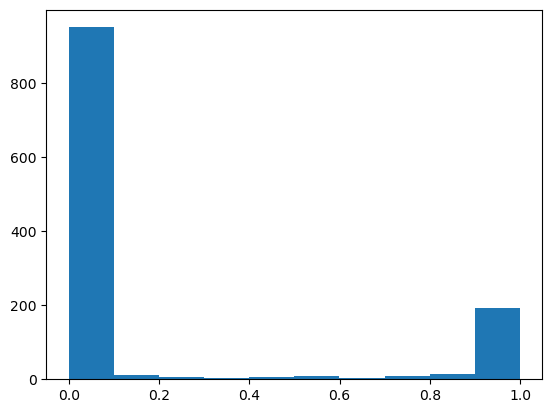

In [283]:
# make predictions on the test set using our trained model
preds = model.predict(dtest)
print(preds)

plt.hist(preds)
plt.show()

In [284]:
threshold = .5

pred_labels = (preds > threshold).astype(int)
print(pred_labels)

[1 1 1 ... 0 0 0]


In [285]:
# compute the auc
auc = roc_auc_score(true_labels, preds)
print('ACU:', auc)

print ('Accuracy:', accuracy_score(true_labels, pred_labels))

ACU: 0.9978450979338028
Accuracy: 0.9850869925434963


Confusion Matrix :


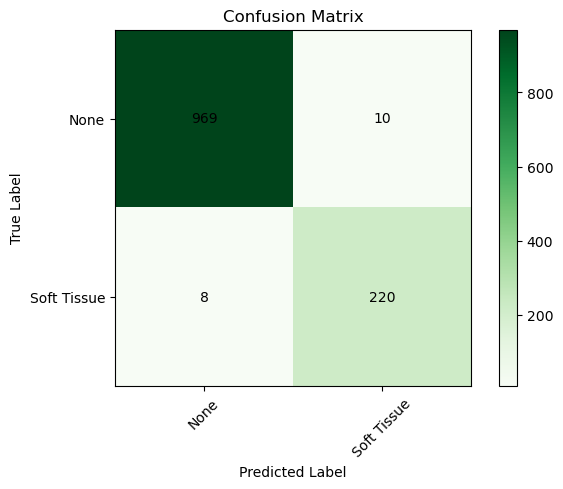

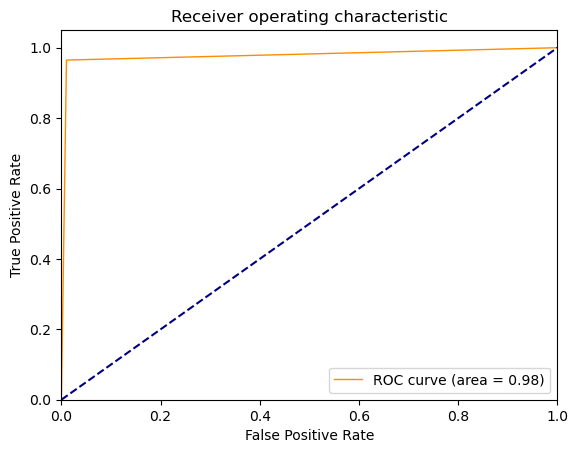

In [286]:
results = confusion_matrix(true_labels, pred_labels) 

print ('Confusion Matrix :')

def plot_confusion_matrix(cm, target_names, title='Confusion Matrix', cmap=plt.cm.Greens):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()

    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')


plot_confusion_matrix(results, ['None','Soft Tissue'])

fpr, tpr, thresholds = roc_curve(true_labels, pred_labels)
roc_auc = roc_auc_score(true_labels, pred_labels)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()